<a href="https://colab.research.google.com/github/matheusfantoni/inteligencia_artificial_praticas/blob/master/Regress%C3%A3o_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Matheus de Carvalho Fantoni - RA: 118120005

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("AnaliseEstudo.csv", sep = ';')

In [ ]:
df.head()

,Idade,TempoEstudo,Faltas,Prova1,Prova2,Prova3
0,18,2,4,0,11,11
1,17,2,2,9,11,11
2,15,2,6,12,13,12
3,15,3,0,14,14,14
4,16,2,0,11,13,13


In [ ]:
df['Prova Media'] = (df['Prova1'] + df['Prova2'] + df['Prova3']) / 3
df.head()

,Idade,TempoEstudo,Faltas,Prova1,Prova2,Prova3,Prova Media
0,18,2,4,0,11,11,7.333333
1,17,2,2,9,11,11,10.333333
2,15,2,6,12,13,12,12.333333
3,15,3,0,14,14,14,14.000000
4,16,2,0,11,13,13,12.333333


In [ ]:
df.loc[df['Prova Media'] >= 12, 'Resultado'] = 1
df.loc[df['Prova Media'] < 12, 'Resultado'] = 0
df.head(10)

,Idade,TempoEstudo,Faltas,Prova1,Prova2,Prova3,Prova Media,Resultado
0,18,2,4,0,11,11,7.333333,0.0
1,17,2,2,9,11,11,10.333333,0.0
2,15,2,6,12,13,12,12.333333,1.0
3,15,3,0,14,14,14,14.000000,1.0
4,16,2,0,11,13,13,12.333333,1.0
5,16,2,6,12,12,13,12.333333,1.0
6,16,2,0,13,12,13,12.666667,1.0
7,17,2,2,10,13,13,12.000000,1.0
8,15,2,0,15,16,17,16.000000,1.0
9,15,2,0,12,12,13,12.333333,1.0


In [ ]:
##### Dividindo os dados em teste e treinamento

X = df[['Idade', 'TempoEstudo', 'Faltas']]
y = df['Resultado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)


In [ ]:
##### Treinando o modelo

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

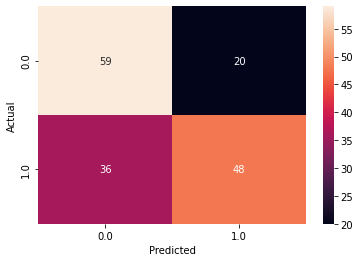

In [ ]:
####### Após o modelo treinado, podemos visualizar a matriz de confusão

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot = True)

In [ ]:
print("Acurácia: ", metrics.accuracy_score(y_test, y_pred))
plt.show()

Acurácia:  0.656441717791411


### Teste realizado para verificar se você seria aprovado ou não de acordo com o modelo de regressão logística criado.

In [ ]:
teste = {'Idade': 23, 'TempoEstudo': 5, 'Faltas': 0}
dft = pd.DataFrame(data = teste, index=[0])
print(dft)
resultado = logistic_regression.predict(dft)

   Idade  TempoEstudo  Faltas
0     23            5       0


In [ ]:
print(resultado)

[1.]
